# IMDB Movie Clustering Project

### 

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.cluster import MeanShift
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## Data Import and Analysis

In [7]:
movies_df=pd.read_csv("Top 1000 IMDB movies.csv")
movies_df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
movies_df.drop("Votes",axis=1,inplace=True)

In [11]:
movies_df.dtypes

Movie Name             object
Year of Release        object
Watch Time             object
Movie Rating          float64
Meatscore of movie     object
Gross                  object
Description            object
dtype: object

In [12]:
movies_df

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,81,$28.34M,Two imprisoned men bond over a number of years...
1,The Godfather,(1972),175 min,9.2,100,$134.97M,The aging patriarch of an organized crime dyna...
2,The Dark Knight,(2008),152 min,9.0,84,$534.86M,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,(1993),195 min,9.0,94,$96.90M,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...
995,Sabrina,(1954),113 min,7.6,72,%^%^%^,A playboy becomes interested in the daughter o...
996,From Here to Eternity,(1953),118 min,7.6,85,$30.50M,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,Snow White and the Seven Dwarfs,(1937),83 min,7.6,95,$184.93M,Exiled into the dangerous forest by her wicked...
998,The 39 Steps,(1935),86 min,7.6,93,%^%^%^,A man in London tries to help a counter-espion...


In [13]:
movies_df["Watch Time"]=movies_df["Watch Time"].replace("[\ min]","",regex=True).astype(int)

In [16]:
movies_df.rename(columns={'Meatscore of movie':'Metascore of movie'},inplace=True)

In [23]:
movies_df["Year of Release"]=movies_df["Year of Release"].replace("[\(, \)]","",regex=True)

In [27]:
movies_df["Year of Release"]=movies_df["Year of Release"].replace("[I]","",regex=True)

In [28]:
movies_df["Year of Release"]=movies_df["Year of Release"].replace("[-]","",regex=True)

In [29]:
movies_df["Year of Release"]=movies_df["Year of Release"].astype(int)

In [32]:
movies_df["Metascore of movie"]=movies_df["Metascore of movie"].replace("[****]","0",regex=True).astype(int)

In [36]:
movies_df["Gross"]=movies_df["Gross"].replace("[$]","",regex=True)

In [37]:
movies_df["Gross"]=movies_df["Gross"].replace("[M]","*(10**6)",regex=True)

In [46]:
movies_df["Gross"]=movies_df["Gross"].replace("[*(10**6)]","",regex=True)

In [58]:
movies_df

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Description
0,The Shawshank Redemption,1994,142,9.3,81,28.34,Two imprisoned men bond over a number of years...
1,The Godfather,1972,175,9.2,100,34.97,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,152,9.0,84,534.8,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,377.85,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,1993,195,9.0,94,9.9,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...
995,Sabrina,1954,113,7.6,72,%^%^%^,A playboy becomes interested in the daughter o...
996,From Here to Eternity,1953,118,7.6,85,3.5,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,Snow White and the Seven Dwarfs,1937,83,7.6,95,84.93,Exiled into the dangerous forest by her wicked...
998,The 39 Steps,1935,86,7.6,93,%^%^%^,A man in London tries to help a counter-espion...


In [62]:
gross_mean=0
num_vals=0
for i,j in movies_df["Gross"].items():
    try:
        float(j)
        gross_mean+=float(j)
        num_vals+=1
    except ValueError:
        pass
gross_mean=round(gross_mean/num_vals,2)
gross_mean

32.82

In [66]:
mask=[]
for i,j in movies_df["Gross"].items():
    try:
        float(j)
        mask.append(False)
    except ValueError:
        mask.append(True)
mask

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 Fal

In [67]:
movies_df.loc[mask, "Gross"] = gross_mean

In [69]:
movies_df["Gross"]=movies_df["Gross"].astype("float")

In [71]:
movies_int=movies_df.drop("Movie Name",axis=1)

In [72]:
movies_int=movies_int.drop("Description",axis=1)

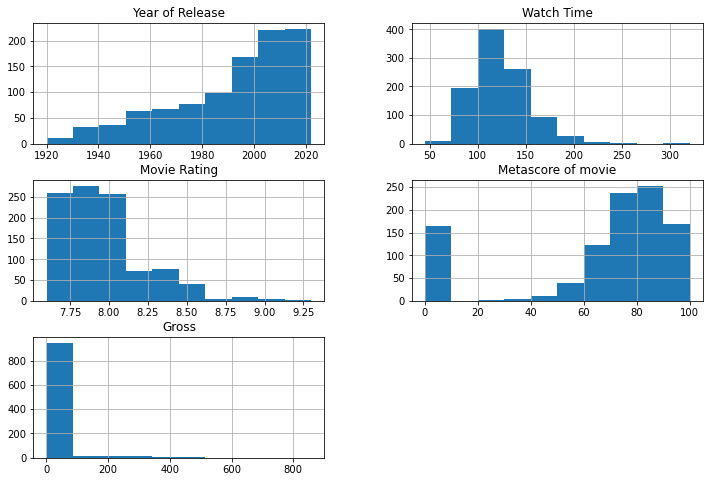

In [78]:
movies_int.hist(figsize=(12,8));

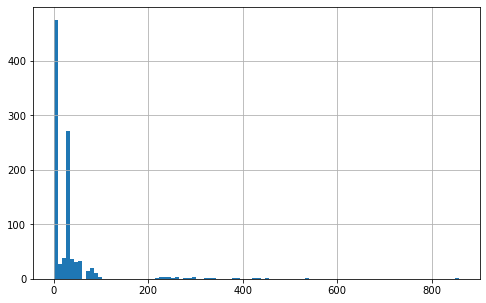

In [81]:
movies_int["Gross"].hist(figsize=(8,5),bins=100);

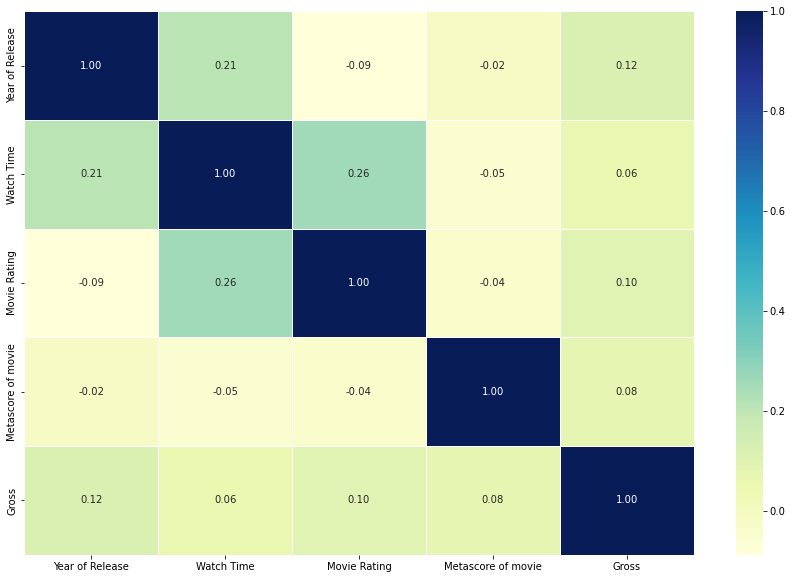

In [82]:
corr_matrix=movies_int.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## Clustering for movies with only number values

In [91]:
movies_int_arr=[]
col_names=movies_int.columns
for cols in col_names:
    arrs=[]
    for i in movies_int[cols]:
        arrs.append(i)
    movies_int_arr.append(arrs)
movies_int_arr

[[1994,
  1972,
  2008,
  2003,
  1993,
  1974,
  1957,
  2021,
  1994,
  2010,
  2002,
  1999,
  2001,
  1994,
  1966,
  2020,
  1999,
  1990,
  1980,
  1975,
  2022,
  2022,
  2014,
  2002,
  2001,
  1998,
  1999,
  1997,
  1995,
  1991,
  1991,
  1977,
  1962,
  1954,
  1946,
  2019,
  2019,
  2019,
  2014,
  2011,
  2021,
  2006,
  2006,
  2002,
  2000,
  1998,
  1995,
  1994,
  1994,
  1988,
  1988,
  1985,
  1979,
  1979,
  1968,
  1960,
  1954,
  1942,
  1936,
  1931,
  2018,
  2019,
  2018,
  2016,
  2018,
  2019,
  2018,
  2017,
  2012,
  2012,
  2021,
  2009,
  2022,
  2021,
  2008,
  2006,
  2003,
  2000,
  1999,
  1997,
  1995,
  1985,
  1986,
  1984,
  1981,
  1981,
  1980,
  1963,
  1964,
  1957,
  1957,
  1950,
  1940,
  2020,
  2018,
  2017,
  2016,
  2013,
  2012,
  2011,
  2010,
  2021,
  2009,
  2007,
  2010,
  2009,
  2004,
  2001,
  2000,
  2000,
  1997,
  1995,
  1995,
  1992,
  1987,
  1984,
  1983,
  1983,
  1973,
  1971,
  1968,
  1962,
  1962,
  1961,
  1960,


In [93]:
temp_movies=[]
for i in range(len(movies_int_arr[0])):
    arr=[]
    for ii in range(len(movies_int_arr)):
        arr.append(movies_int_arr[ii][i])
    temp_movies.append(arr)
temp_movies

[[1994, 142, 9.3, 81, 28.34],
 [1972, 175, 9.2, 100, 34.97],
 [2008, 152, 9.0, 84, 534.8],
 [2003, 201, 9.0, 94, 377.85],
 [1993, 195, 9.0, 94, 9.9],
 [1974, 202, 9.0, 90, 57.3],
 [1957, 96, 9.0, 96, 4.3],
 [2021, 164, 8.9, 0, 32.82],
 [1994, 154, 8.9, 94, 7.93],
 [2010, 148, 8.8, 74, 292.58],
 [2002, 179, 8.8, 87, 342.55],
 [1999, 139, 8.8, 66, 37.3],
 [2001, 178, 8.8, 92, 35.54],
 [1994, 142, 8.8, 82, 33.25],
 [1966, 178, 8.8, 90, 32.82],
 [2020, 153, 8.7, 0, 32.82],
 [1999, 136, 8.7, 73, 7.48],
 [1990, 145, 8.7, 90, 4.84],
 [1980, 124, 8.7, 82, 29.48],
 [1975, 133, 8.7, 84, 2.0],
 [2022, 175, 8.6, 0, 32.82],
 [2022, 130, 8.6, 78, 32.82],
 [2014, 169, 8.6, 74, 88.2],
 [2002, 130, 8.6, 79, 7.5],
 [2001, 125, 8.6, 96, 32.82],
 [1998, 169, 8.6, 91, 2.54],
 [1999, 189, 8.6, 61, 3.8],
 [1997, 116, 8.6, 59, 57.0],
 [1995, 127, 8.6, 65, 0.3],
 [1991, 137, 8.6, 75, 24.84],
 [1991, 118, 8.6, 85, 3.74],
 [1977, 121, 8.6, 90, 322.74],
 [1962, 133, 8.6, 85, 32.82],
 [1954, 207, 8.6, 98, 0.27],
 

In [95]:
movies_int_arr=temp_movies
temp_movies=np.array([np.array(xi) for xi in movies_int_arr])
movies_int_arr=temp_movies

In [106]:
clustering_1=MeanShift().fit(movies_int_arr)
clustering_1.labels_

array([0, 0, 3, 4, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

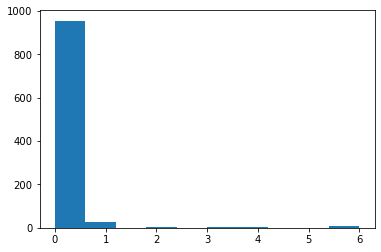

In [111]:
plt.hist(clustering_1.labels_);

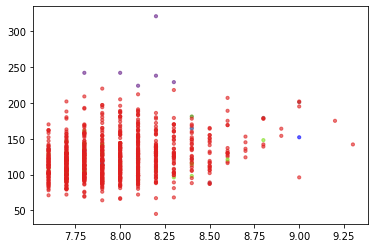

In [123]:
df=movies_int
df['cluster']=clustering_1.labels_
centroids = clustering_1.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3], 4:cen_x[4], 5:cen_x[5],6:cen_x[6]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3], 4:cen_x[4], 5:cen_x[5],6:cen_x[6]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#0000FF','#8B2323','#458B00','#68228B']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})
plt.scatter(df["Movie Rating"], df["Watch Time"], c=df.c, alpha = 0.6, s=10);

In [130]:
clustering_2=KMeans(n_clusters=4).fit(movies_int_arr)
clustering_2.labels_

array([1, 1, 2, 2, 1, 1, 0, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 3, 3, 1, 0, 0, 3, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 2,
       1, 0, 1, 2, 3, 1, 3, 3, 2, 1, 0, 0, 0, 0, 1, 3, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 0, 1, 2, 3, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 3, 0,
       0, 3, 0, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 0, 1, 1,
       1, 3, 3, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 3, 1, 1, 3, 0, 3, 1, 3, 3, 3, 1, 0,
       0, 0, 3, 3, 0, 1, 0, 1, 3, 1, 0, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1,
       3, 3, 0, 1, 1, 3, 0, 0, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 2,
       1, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 0, 1, 3, 3, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 0,

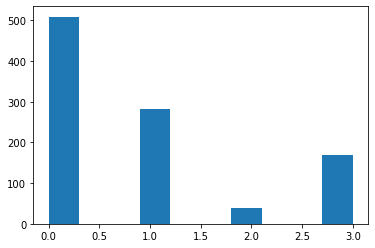

In [132]:
plt.hist(clustering_2.labels_);

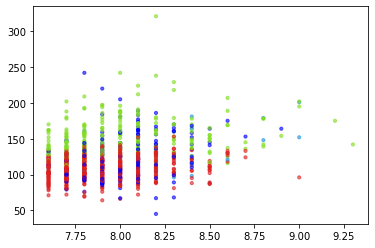

In [133]:
df=movies_int
df['cluster']=clustering_2.labels_
centroids = clustering_2.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#0000FF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
plt.scatter(df["Movie Rating"], df["Watch Time"], c=df.c, alpha = 0.6, s=10);

In [136]:
clustering_3=KMeans(n_clusters=10).fit(movies_int_arr)
clustering_3.labels_

array([0, 8, 3, 3, 8, 8, 5, 4, 0, 1, 1, 0, 8, 0, 8, 4, 0, 0, 5, 0, 4, 0,
       2, 0, 0, 0, 8, 2, 0, 0, 9, 1, 5, 8, 5, 4, 4, 2, 9, 9, 4, 2, 0, 0,
       2, 9, 9, 9, 3, 0, 9, 9, 2, 2, 8, 5, 5, 5, 5, 5, 0, 1, 4, 9, 9, 7,
       2, 9, 0, 3, 4, 0, 4, 4, 1, 0, 9, 9, 9, 0, 8, 4, 2, 0, 1, 0, 2, 5,
       5, 6, 5, 6, 6, 0, 4, 4, 4, 4, 9, 0, 0, 2, 1, 4, 2, 0, 9, 0, 9, 9,
       2, 9, 8, 9, 9, 8, 8, 2, 2, 0, 0, 5, 8, 8, 5, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 4, 2, 4, 4, 4, 4, 2, 0, 4, 4, 4, 4, 9, 8, 4, 0, 0, 0,
       2, 4, 4, 9, 8, 2, 4, 0, 2, 0, 0, 0, 9, 0, 9, 9, 1, 9, 9, 0, 9, 8,
       2, 0, 2, 2, 0, 9, 5, 5, 5, 5, 4, 5, 5, 5, 8, 5, 5, 8, 5, 6, 5, 5,
       5, 5, 5, 5, 8, 6, 6, 6, 6, 9, 4, 0, 2, 4, 9, 4, 0, 4, 4, 4, 0, 9,
       9, 9, 4, 4, 2, 0, 9, 0, 4, 0, 9, 0, 2, 4, 4, 4, 0, 0, 2, 4, 2, 0,
       4, 4, 9, 0, 0, 4, 0, 9, 9, 9, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 1,
       8, 9, 9, 9, 9, 9, 9, 4, 0, 6, 9, 9, 0, 9, 8, 4, 4, 2, 9, 2, 2, 4,
       5, 0, 8, 8, 5, 4, 6, 8, 5, 5, 4, 4, 5, 8, 5,

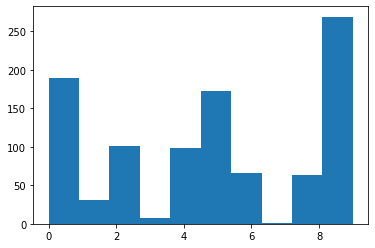

In [137]:
plt.hist(clustering_3.labels_);

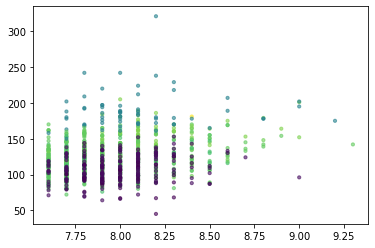

In [138]:
df=movies_int
df['cluster']=clustering_3.labels_
centroids = clustering_3.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#0000FF','#458B74','#E3CF57','#000000','#A52A2A','#8A360F','#DC143C']
df['c'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9]})
plt.scatter(df["Movie Rating"], df["Watch Time"], c=df.c, alpha = 0.6, s=10);

In [139]:
clustering_4=KMeans(n_clusters=11).fit(movies_int_arr)
clustering_4.labels_

array([ 6,  8,  2,  2,  8,  8,  5, 10,  6,  4,  4,  6,  8,  6,  8, 10,  6,
        6,  9,  6, 10,  9,  0,  6,  9,  6,  8,  0,  1,  6,  1,  4,  5,  8,
        5, 10, 10,  9,  1,  1, 10,  0,  6,  6,  0,  1,  9,  1,  2,  6,  9,
        1,  0,  0,  8,  5,  5,  5,  5,  5,  9,  4, 10,  1,  1,  3,  0,  9,
        6,  2, 10,  6, 10, 10,  4,  6,  1,  9,  1,  6,  0, 10,  0,  6,  4,
        6,  0,  5,  5,  7,  5,  7,  7,  6, 10, 10, 10, 10,  1,  1,  6,  0,
        4, 10,  9,  6,  9,  9,  1,  1,  9,  1,  6,  1,  1,  8,  8,  9,  0,
        6,  6,  5,  8,  8,  5,  5,  5,  7,  5,  5,  7,  5,  5,  7,  5,  7,
       10,  9, 10, 10, 10, 10,  0,  6, 10, 10, 10, 10,  9,  8, 10,  6,  6,
        6,  9, 10, 10,  9,  6,  0, 10,  6,  9,  6,  6,  6,  1,  6,  1,  9,
        4,  1,  9,  6,  1,  8,  9,  9,  0,  0,  6,  1,  5,  9,  5,  5, 10,
        5,  5,  5,  8,  5,  5,  8,  5,  7,  5,  5,  5,  5,  5,  5,  8,  7,
        7,  7,  7,  1, 10,  9,  9, 10,  9, 10,  6, 10, 10, 10,  6,  1,  1,
        1, 10, 10,  9,  6

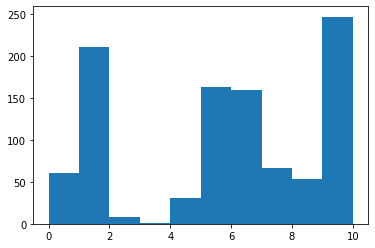

In [140]:
plt.hist(clustering_4.labels_);

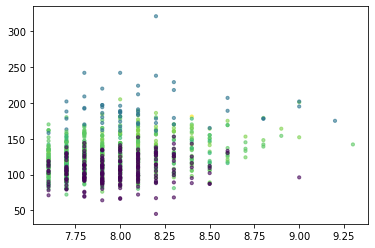

In [142]:
df=movies_int
df['cluster']=clustering_4.labels_
centroids = clustering_4.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9], 10:cen_x[10]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9], 10:cen_x[10]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#0000FF','#458B74','#E3CF57','#000000','#A52A2A','#8A360F','#DC143C','#8B8878']
df['c'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5], 6:cen_x[6],7:cen_x[7],8:cen_x[8], 9:cen_x[9], 10:cen_x[10]})
plt.scatter(df["Movie Rating"], df["Watch Time"], c=df.c, alpha = 0.6, s=10);

## Text Interpretation Clustering

In [143]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

In [144]:
descriptions=movies_df["Description"]

In [146]:
desc_arr=[]
for i,j in descriptions.items():
    desc_arr.append(j)
desc_arr

['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.',
 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
 "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.",
 'In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.',
 'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.',
 'The jury in a New York C

In [168]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(desc_arr)

In [170]:
true_k = 4
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
model1.fit(X)

KMeans(max_iter=100, n_clusters=4)

In [171]:
print("Top terms per cluster:")
order_centroids = model1.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 life
 early
 new
 woman
 family
 discovers
 finds
 crime
 live
 way
Cluster 1:
 young
 man
 family
 woman
 new
 father
 wife
 friends
 love
 murder
Cluster 2:
 war
 world
 ii
 agent
 american
 man
 german
 finds
 young
 civil
Cluster 3:
 story
 old
 year
 friend
 home
 returns
 man
 town
 young
 tells


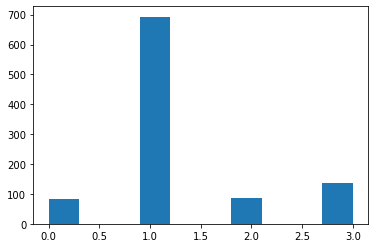

In [183]:
plt.hist(model1.labels_);

In [172]:
true_k=10
model2= KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
model2.fit(X)

KMeans(max_iter=100, n_clusters=10)

In [173]:
print("Top terms per cluster:")
order_centroids = model2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 man
 way
 takes
 new
 life
 sets
 wife
 goes
 murder
 case
Cluster 1:
 girl
 life
 boy
 new
 love
 story
 finds
 mysterious
 year
 home
Cluster 2:
 time
 powerful
 evil
 destroy
 harry
 world
 uncover
 small
 race
 cyborg
Cluster 3:
 lives
 los
 angeles
 violence
 living
 future
 day
 race
 friends
 follows
Cluster 4:
 people
 dead
 insane
 body
 scientist
 prove
 struggling
 team
 believe
 process
Cluster 5:
 town
 christmas
 king
 small
 attempts
 causes
 discovers
 man
 new
 jack
Cluster 6:
 war
 world
 american
 ii
 story
 german
 african
 french
 civil
 army
Cluster 7:
 woman
 young
 star
 life
 movie
 man
 unlikely
 help
 struggles
 children
Cluster 8:
 father
 old
 man
 secret
 son
 struggle
 comes
 long
 brothers
 young
Cluster 9:
 family
 look
 crime
 murdered
 life
 marriage
 man
 breaking
 save
 eccentric


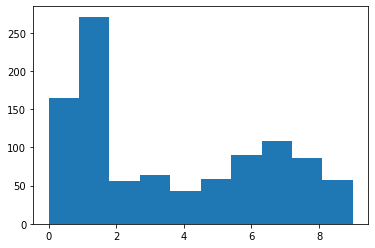

In [184]:
plt.hist(model2.labels_);

In [174]:
true_k=11
model3= KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
model3.fit(X)

KMeans(max_iter=100, n_clusters=11)

In [175]:
print("Top terms per cluster:")
order_centroids = model3.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 man
 story
 team
 lives
 town
 love
 american
 village
 men
 leads
Cluster 1:
 father
 boy
 past
 order
 young
 son
 magical
 man
 named
 returns
Cluster 2:
 death
 human
 body
 dr
 monster
 young
 men
 perfect
 frankenstein
 plan
Cluster 3:
 war
 world
 ii
 german
 jewish
 american
 tries
 camp
 young
 occupied
Cluster 4:
 finds
 life
 agent
 undercover
 mob
 man
 new
 girl
 young
 fbi
Cluster 5:
 friends
 friend
 long
 memories
 life
 days
 best
 college
 lost
 inspired
Cluster 6:
 family
 violent
 child
 leaves
 russian
 life
 man
 crime
 new
 year
Cluster 7:
 help
 killer
 serial
 catch
 girl
 victims
 old
 young
 city
 child
Cluster 8:
 woman
 husband
 begins
 young
 ex
 learn
 rich
 life
 wife
 search
Cluster 9:
 young
 star
 relationship
 film
 hollywood
 develops
 era
 dancer
 man
 old
Cluster 10:
 school
 new
 high
 war
 french
 student
 young
 man
 city
 class


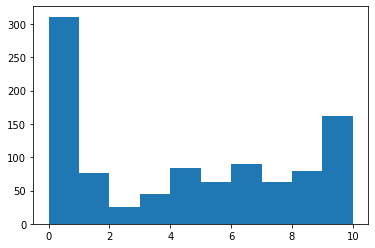

In [185]:
plt.hist(model3.labels_);

In [176]:
true_k=4
model4= KMeans(n_clusters=true_k)
model4.fit(X)

KMeans(n_clusters=4)

In [177]:
print("Top terms per cluster:")
order_centroids = model4.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 life
 family
 new
 young
 boy
 finds
 friends
 father
 men
 team
Cluster 1:
 world
 story
 war
 ii
 life
 man
 young
 german
 tells
 american
Cluster 2:
 woman
 love
 murder
 police
 young
 falls
 detective
 life
 finds
 husband
Cluster 3:
 man
 help
 wife
 young
 lawyer
 new
 family
 old
 case
 father


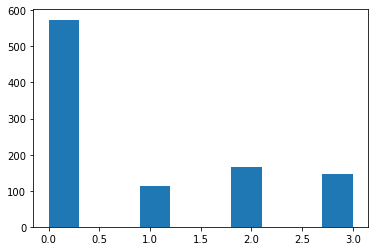

In [186]:
plt.hist(model4.labels_);

In [178]:
true_k=10
model5= KMeans(n_clusters=true_k)
model5.fit(X)

KMeans(n_clusters=10)

In [179]:
print("Top terms per cluster:")
order_centroids = model5.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 love
 group
 war
 falls
 tragedies
 search
 woman
 hate
 people
 young
Cluster 1:
 city
 story
 police
 crime
 team
 town
 american
 men
 years
 begins
Cluster 2:
 life
 finds
 new
 professional
 quest
 struggle
 woman
 young
 ring
 way
Cluster 3:
 old
 year
 new
 york
 girl
 friendship
 living
 home
 city
 man
Cluster 4:
 young
 wife
 mother
 time
 woman
 boy
 long
 man
 father
 girl
Cluster 5:
 family
 man
 lawyer
 young
 father
 help
 case
 life
 story
 torn
Cluster 6:
 lives
 friends
 star
 aging
 ruthless
 young
 man
 broadway
 childhood
 day
Cluster 7:
 tries
 brother
 wrong
 nazi
 path
 going
 father
 prevent
 desperate
 american
Cluster 8:
 world
 war
 ii
 german
 army
 young
 forces
 survive
 allied
 jewish
Cluster 9:
 takes
 indian
 journey
 country
 embarks
 man
 president
 united
 states
 war


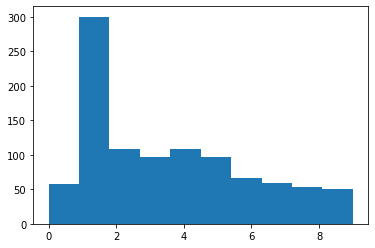

In [187]:
plt.hist(model5.labels_);

In [180]:
true_k=11
model6= KMeans(n_clusters=true_k)
model6.fit(X)

KMeans(n_clusters=11)

In [181]:
print("Top terms per cluster:")
order_centroids = model6.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 world
 story
 war
 ii
 star
 german
 american
 man
 tells
 live
Cluster 1:
 father
 goes
 death
 army
 son
 save
 daughter
 young
 uncle
 returns
Cluster 2:
 agent
 years
 police
 finds
 group
 woman
 secret
 lover
 friends
 murder
Cluster 3:
 work
 space
 accident
 leaves
 survive
 man
 stranded
 son
 astronauts
 life
Cluster 4:
 family
 college
 torn
 child
 business
 man
 middle
 life
 early
 threatened
Cluster 5:
 love
 girl
 falls
 murder
 discovers
 way
 decides
 town
 woman
 finds
Cluster 6:
 young
 man
 new
 york
 past
 woman
 city
 mother
 wife
 boy
Cluster 7:
 help
 killer
 serial
 catch
 victims
 young
 old
 city
 child
 woman
Cluster 8:
 soldiers
 officer
 general
 enemy
 war
 defend
 attack
 british
 unit
 position
Cluster 9:
 life
 mysterious
 crime
 series
 events
 know
 change
 based
 new
 son
Cluster 10:
 lives
 day
 angeles
 los
 residents
 school
 love
 men
 corruption
 life


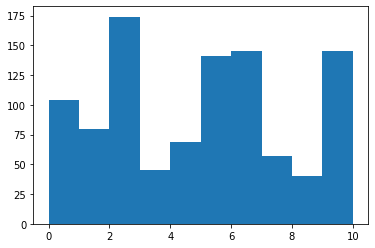

In [188]:
plt.hist(model6.labels_);

In [191]:
model_5=MeanShift().fit(X.toarray())

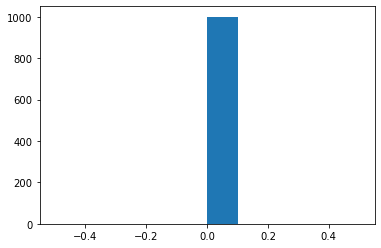

In [194]:
plt.hist(model_5.labels_);

## Clustering by Titles 

In [207]:
titles=movies_df["Movie Name"]
titles_arr=[]
for i,j in titles.items():
    titles_arr.append(j)
titles_arr

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'The Godfather: Part II',
 '12 Angry Men',
 'Jai Bhim',
 'Pulp Fiction',
 'Inception',
 'The Lord of the Rings: The Two Towers',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'The Good, the Bad and the Ugly',
 'Soorarai Pottru',
 'The Matrix',
 'Goodfellas',
 'Star Wars: Episode V - The Empire Strikes Back',
 "One Flew Over the Cuckoo's Nest",
 'Vikram',
 'Top Gun: Maverick',
 'Interstellar',
 'City of God',
 'Spirited Away',
 'Saving Private Ryan',
 'The Green Mile',
 'Life Is Beautiful',
 'Se7en',
 'Terminator 2: Judgment Day',
 'The Silence of the Lambs',
 'Star Wars',
 'Harakiri',
 'Seven Samurai',
 "It's a Wonderful Life",
 'Kaithi',
 'Asuran',
 'Parasite',
 'Whiplash',
 'The Intouchables',
 'Sardar Udham',
 'The Prestige',
 'The Departed',
 'The Pianist',
 'Gladiator',
 'American History X',
 'The Usual

In [218]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles_arr)

## Final Clustering

In [226]:
movies_int.drop('cluster',axis=1,inplace=True)

In [228]:
movies_int.drop('cen_x',axis=1,inplace=True)

In [229]:
movies_int.drop('cen_y',axis=1,inplace=True)

In [230]:
movies_int.drop('c',axis=1,inplace=True)

In [232]:
movies_int["Desc_Clusters"]=model6.labels_

In [233]:
movies_int

,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Desc_Clusters
0,1994,142,9.3,81,28.34,2
1,1972,175,9.2,100,34.97,6
2,2008,152,9.0,84,534.80,1
3,2003,201,9.0,94,377.85,1
4,1993,195,9.0,94,9.90,0
...,...,...,...,...,...,...
995,1954,113,7.6,72,32.82,4
996,1953,118,7.6,85,3.50,8
997,1937,83,7.6,95,84.93,5
998,1935,86,7.6,93,32.82,2


In [234]:
columns=movies_int.columns

In [241]:
movies_int[columns[0]][1]

1972

In [382]:
temp_movies=[]
for i in columns:
    vals=[]
    for j in range(len(movies_int[i])):
        vals.append(movies_int[i][j])
    temp_movies.append(vals)
temp_movies

[[1994,
  1972,
  2008,
  2003,
  1993,
  1974,
  1957,
  2021,
  1994,
  2010,
  2002,
  1999,
  2001,
  1994,
  1966,
  2020,
  1999,
  1990,
  1980,
  1975,
  2022,
  2022,
  2014,
  2002,
  2001,
  1998,
  1999,
  1997,
  1995,
  1991,
  1991,
  1977,
  1962,
  1954,
  1946,
  2019,
  2019,
  2019,
  2014,
  2011,
  2021,
  2006,
  2006,
  2002,
  2000,
  1998,
  1995,
  1994,
  1994,
  1988,
  1988,
  1985,
  1979,
  1979,
  1968,
  1960,
  1954,
  1942,
  1936,
  1931,
  2018,
  2019,
  2018,
  2016,
  2018,
  2019,
  2018,
  2017,
  2012,
  2012,
  2021,
  2009,
  2022,
  2021,
  2008,
  2006,
  2003,
  2000,
  1999,
  1997,
  1995,
  1985,
  1986,
  1984,
  1981,
  1981,
  1980,
  1963,
  1964,
  1957,
  1957,
  1950,
  1940,
  2020,
  2018,
  2017,
  2016,
  2013,
  2012,
  2011,
  2010,
  2021,
  2009,
  2007,
  2010,
  2009,
  2004,
  2001,
  2000,
  2000,
  1997,
  1995,
  1995,
  1992,
  1987,
  1984,
  1983,
  1983,
  1973,
  1971,
  1968,
  1962,
  1962,
  1961,
  1960,


In [383]:
movies_fin_arr=[]
for i in range(len(temp_movies[0])):
    temp=[]
    for ii in range(len(temp_movies)):
        temp.append(temp_movies[ii][i])
    movies_fin_arr.append(temp)
movies_fin_arr

[[1994, 142, 9.3, 81, 28.34, 2],
 [1972, 175, 9.2, 100, 34.97, 6],
 [2008, 152, 9.0, 84, 534.8, 1],
 [2003, 201, 9.0, 94, 377.85, 1],
 [1993, 195, 9.0, 94, 9.9, 0],
 [1974, 202, 9.0, 90, 57.3, 9],
 [1957, 96, 9.0, 96, 4.3, 6],
 [2021, 164, 8.9, 0, 32.82, 5],
 [1994, 154, 8.9, 94, 7.93, 10],
 [2010, 148, 8.8, 74, 292.58, 6],
 [2002, 179, 8.8, 87, 342.55, 7],
 [1999, 139, 8.8, 66, 37.3, 5],
 [2001, 178, 8.8, 92, 35.54, 1],
 [1994, 142, 8.8, 82, 33.25, 9],
 [1966, 178, 8.8, 90, 32.82, 0],
 [2020, 153, 8.7, 0, 32.82, 6],
 [1999, 136, 8.7, 73, 7.48, 5],
 [1990, 145, 8.7, 90, 4.84, 9],
 [1980, 124, 8.7, 82, 29.48, 2],
 [1975, 133, 8.7, 84, 2.0, 5],
 [2022, 175, 8.6, 0, 32.82, 7],
 [2022, 130, 8.6, 78, 32.82, 5],
 [2014, 169, 8.6, 74, 88.2, 3],
 [2002, 130, 8.6, 79, 7.5, 0],
 [2001, 125, 8.6, 96, 32.82, 5],
 [1998, 169, 8.6, 91, 2.54, 8],
 [1999, 189, 8.6, 61, 3.8, 10],
 [1997, 116, 8.6, 59, 57.0, 7],
 [1995, 127, 8.6, 65, 0.3, 7],
 [1991, 137, 8.6, 75, 24.84, 2],
 [1991, 118, 8.6, 85, 3.74, 

In [247]:
titles=movies_df["Movie Name"]

In [251]:
titles_arr=[]
for i in range(len(titles)):
    titles_arr.append(titles[i])
titles_arr

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'The Godfather: Part II',
 '12 Angry Men',
 'Jai Bhim',
 'Pulp Fiction',
 'Inception',
 'The Lord of the Rings: The Two Towers',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'The Good, the Bad and the Ugly',
 'Soorarai Pottru',
 'The Matrix',
 'Goodfellas',
 'Star Wars: Episode V - The Empire Strikes Back',
 "One Flew Over the Cuckoo's Nest",
 'Vikram',
 'Top Gun: Maverick',
 'Interstellar',
 'City of God',
 'Spirited Away',
 'Saving Private Ryan',
 'The Green Mile',
 'Life Is Beautiful',
 'Se7en',
 'Terminator 2: Judgment Day',
 'The Silence of the Lambs',
 'Star Wars',
 'Harakiri',
 'Seven Samurai',
 "It's a Wonderful Life",
 'Kaithi',
 'Asuran',
 'Parasite',
 'Whiplash',
 'The Intouchables',
 'Sardar Udham',
 'The Prestige',
 'The Departed',
 'The Pianist',
 'Gladiator',
 'American History X',
 'The Usual

In [255]:
movies_fin_arr2=movies_fin_arr
for i in range(len(movies_fin_arr2)):
    movies_fin_arr2[i].append(movies_fin_arr2[i][len(movies_fin_arr2[i])-1])
movies_fin_arr2

[[1994, 142, 9.3, 81, 28.34, 2, 2],
 [1972, 175, 9.2, 100, 34.97, 6, 6],
 [2008, 152, 9.0, 84, 534.8, 1, 1],
 [2003, 201, 9.0, 94, 377.85, 1, 1],
 [1993, 195, 9.0, 94, 9.9, 0, 0],
 [1974, 202, 9.0, 90, 57.3, 9, 9],
 [1957, 96, 9.0, 96, 4.3, 6, 6],
 [2021, 164, 8.9, 0, 32.82, 5, 5],
 [1994, 154, 8.9, 94, 7.93, 10, 10],
 [2010, 148, 8.8, 74, 292.58, 6, 6],
 [2002, 179, 8.8, 87, 342.55, 7, 7],
 [1999, 139, 8.8, 66, 37.3, 5, 5],
 [2001, 178, 8.8, 92, 35.54, 1, 1],
 [1994, 142, 8.8, 82, 33.25, 9, 9],
 [1966, 178, 8.8, 90, 32.82, 0, 0],
 [2020, 153, 8.7, 0, 32.82, 6, 6],
 [1999, 136, 8.7, 73, 7.48, 5, 5],
 [1990, 145, 8.7, 90, 4.84, 9, 9],
 [1980, 124, 8.7, 82, 29.48, 2, 2],
 [1975, 133, 8.7, 84, 2.0, 5, 5],
 [2022, 175, 8.6, 0, 32.82, 7, 7],
 [2022, 130, 8.6, 78, 32.82, 5, 5],
 [2014, 169, 8.6, 74, 88.2, 3, 3],
 [2002, 130, 8.6, 79, 7.5, 0, 0],
 [2001, 125, 8.6, 96, 32.82, 5, 5],
 [1998, 169, 8.6, 91, 2.54, 8, 8],
 [1999, 189, 8.6, 61, 3.8, 10, 10],
 [1997, 116, 8.6, 59, 57.0, 7, 7],
 [1995

In [256]:
movies_fin_arr3=movies_fin_arr2
for i in range(len(movies_fin_arr3)):
    movies_fin_arr3[i].append(movies_fin_arr3[i][len(movies_fin_arr3[i])-1])
movies_fin_arr3

[[1994, 142, 9.3, 81, 28.34, 2, 2, 2],
 [1972, 175, 9.2, 100, 34.97, 6, 6, 6],
 [2008, 152, 9.0, 84, 534.8, 1, 1, 1],
 [2003, 201, 9.0, 94, 377.85, 1, 1, 1],
 [1993, 195, 9.0, 94, 9.9, 0, 0, 0],
 [1974, 202, 9.0, 90, 57.3, 9, 9, 9],
 [1957, 96, 9.0, 96, 4.3, 6, 6, 6],
 [2021, 164, 8.9, 0, 32.82, 5, 5, 5],
 [1994, 154, 8.9, 94, 7.93, 10, 10, 10],
 [2010, 148, 8.8, 74, 292.58, 6, 6, 6],
 [2002, 179, 8.8, 87, 342.55, 7, 7, 7],
 [1999, 139, 8.8, 66, 37.3, 5, 5, 5],
 [2001, 178, 8.8, 92, 35.54, 1, 1, 1],
 [1994, 142, 8.8, 82, 33.25, 9, 9, 9],
 [1966, 178, 8.8, 90, 32.82, 0, 0, 0],
 [2020, 153, 8.7, 0, 32.82, 6, 6, 6],
 [1999, 136, 8.7, 73, 7.48, 5, 5, 5],
 [1990, 145, 8.7, 90, 4.84, 9, 9, 9],
 [1980, 124, 8.7, 82, 29.48, 2, 2, 2],
 [1975, 133, 8.7, 84, 2.0, 5, 5, 5],
 [2022, 175, 8.6, 0, 32.82, 7, 7, 7],
 [2022, 130, 8.6, 78, 32.82, 5, 5, 5],
 [2014, 169, 8.6, 74, 88.2, 3, 3, 3],
 [2002, 130, 8.6, 79, 7.5, 0, 0, 0],
 [2001, 125, 8.6, 96, 32.82, 5, 5, 5],
 [1998, 169, 8.6, 91, 2.54, 8, 8, 8]

In [257]:
movies_fin_arr4=movies_fin_arr3
for i in range(len(movies_fin_arr4)):
    movies_fin_arr4[i].append(movies_fin_arr4[i][len(movies_fin_arr4[i])-1])
movies_fin_arr4

[[1994, 142, 9.3, 81, 28.34, 2, 2, 2, 2],
 [1972, 175, 9.2, 100, 34.97, 6, 6, 6, 6],
 [2008, 152, 9.0, 84, 534.8, 1, 1, 1, 1],
 [2003, 201, 9.0, 94, 377.85, 1, 1, 1, 1],
 [1993, 195, 9.0, 94, 9.9, 0, 0, 0, 0],
 [1974, 202, 9.0, 90, 57.3, 9, 9, 9, 9],
 [1957, 96, 9.0, 96, 4.3, 6, 6, 6, 6],
 [2021, 164, 8.9, 0, 32.82, 5, 5, 5, 5],
 [1994, 154, 8.9, 94, 7.93, 10, 10, 10, 10],
 [2010, 148, 8.8, 74, 292.58, 6, 6, 6, 6],
 [2002, 179, 8.8, 87, 342.55, 7, 7, 7, 7],
 [1999, 139, 8.8, 66, 37.3, 5, 5, 5, 5],
 [2001, 178, 8.8, 92, 35.54, 1, 1, 1, 1],
 [1994, 142, 8.8, 82, 33.25, 9, 9, 9, 9],
 [1966, 178, 8.8, 90, 32.82, 0, 0, 0, 0],
 [2020, 153, 8.7, 0, 32.82, 6, 6, 6, 6],
 [1999, 136, 8.7, 73, 7.48, 5, 5, 5, 5],
 [1990, 145, 8.7, 90, 4.84, 9, 9, 9, 9],
 [1980, 124, 8.7, 82, 29.48, 2, 2, 2, 2],
 [1975, 133, 8.7, 84, 2.0, 5, 5, 5, 5],
 [2022, 175, 8.6, 0, 32.82, 7, 7, 7, 7],
 [2022, 130, 8.6, 78, 32.82, 5, 5, 5, 5],
 [2014, 169, 8.6, 74, 88.2, 3, 3, 3, 3],
 [2002, 130, 8.6, 79, 7.5, 0, 0, 0, 0],
 [

In [258]:
movies_fin_arr5=movies_fin_arr4
for i in range(len(movies_fin_arr5)):
    movies_fin_arr5[i].append(movies_fin_arr5[i][len(movies_fin_arr5[i])-1])
movies_fin_arr5

[[1994, 142, 9.3, 81, 28.34, 2, 2, 2, 2, 2],
 [1972, 175, 9.2, 100, 34.97, 6, 6, 6, 6, 6],
 [2008, 152, 9.0, 84, 534.8, 1, 1, 1, 1, 1],
 [2003, 201, 9.0, 94, 377.85, 1, 1, 1, 1, 1],
 [1993, 195, 9.0, 94, 9.9, 0, 0, 0, 0, 0],
 [1974, 202, 9.0, 90, 57.3, 9, 9, 9, 9, 9],
 [1957, 96, 9.0, 96, 4.3, 6, 6, 6, 6, 6],
 [2021, 164, 8.9, 0, 32.82, 5, 5, 5, 5, 5],
 [1994, 154, 8.9, 94, 7.93, 10, 10, 10, 10, 10],
 [2010, 148, 8.8, 74, 292.58, 6, 6, 6, 6, 6],
 [2002, 179, 8.8, 87, 342.55, 7, 7, 7, 7, 7],
 [1999, 139, 8.8, 66, 37.3, 5, 5, 5, 5, 5],
 [2001, 178, 8.8, 92, 35.54, 1, 1, 1, 1, 1],
 [1994, 142, 8.8, 82, 33.25, 9, 9, 9, 9, 9],
 [1966, 178, 8.8, 90, 32.82, 0, 0, 0, 0, 0],
 [2020, 153, 8.7, 0, 32.82, 6, 6, 6, 6, 6],
 [1999, 136, 8.7, 73, 7.48, 5, 5, 5, 5, 5],
 [1990, 145, 8.7, 90, 4.84, 9, 9, 9, 9, 9],
 [1980, 124, 8.7, 82, 29.48, 2, 2, 2, 2, 2],
 [1975, 133, 8.7, 84, 2.0, 5, 5, 5, 5, 5],
 [2022, 175, 8.6, 0, 32.82, 7, 7, 7, 7, 7],
 [2022, 130, 8.6, 78, 32.82, 5, 5, 5, 5, 5],
 [2014, 169, 8.6

In [259]:
movies_fin_arr6=movies_fin_arr5
for i in range(len(movies_fin_arr6)):
    movies_fin_arr6[i].append(movies_fin_arr6[i][len(movies_fin_arr6[i])-10])
    movies_fin_arr6[i].append(movies_fin_arr6[i][len(movies_fin_arr6[i])-10])
    movies_fin_arr6[i].append(movies_fin_arr6[i][len(movies_fin_arr6[i])-10])
    movies_fin_arr6[i].append(movies_fin_arr6[i][len(movies_fin_arr6[i])-10])
movies_fin_arr6

[[1994, 142, 9.3, 81, 28.34, 2, 2, 2, 2, 2, 1994, 142, 9.3, 81],
 [1972, 175, 9.2, 100, 34.97, 6, 6, 6, 6, 6, 1972, 175, 9.2, 100],
 [2008, 152, 9.0, 84, 534.8, 1, 1, 1, 1, 1, 2008, 152, 9.0, 84],
 [2003, 201, 9.0, 94, 377.85, 1, 1, 1, 1, 1, 2003, 201, 9.0, 94],
 [1993, 195, 9.0, 94, 9.9, 0, 0, 0, 0, 0, 1993, 195, 9.0, 94],
 [1974, 202, 9.0, 90, 57.3, 9, 9, 9, 9, 9, 1974, 202, 9.0, 90],
 [1957, 96, 9.0, 96, 4.3, 6, 6, 6, 6, 6, 1957, 96, 9.0, 96],
 [2021, 164, 8.9, 0, 32.82, 5, 5, 5, 5, 5, 2021, 164, 8.9, 0],
 [1994, 154, 8.9, 94, 7.93, 10, 10, 10, 10, 10, 1994, 154, 8.9, 94],
 [2010, 148, 8.8, 74, 292.58, 6, 6, 6, 6, 6, 2010, 148, 8.8, 74],
 [2002, 179, 8.8, 87, 342.55, 7, 7, 7, 7, 7, 2002, 179, 8.8, 87],
 [1999, 139, 8.8, 66, 37.3, 5, 5, 5, 5, 5, 1999, 139, 8.8, 66],
 [2001, 178, 8.8, 92, 35.54, 1, 1, 1, 1, 1, 2001, 178, 8.8, 92],
 [1994, 142, 8.8, 82, 33.25, 9, 9, 9, 9, 9, 1994, 142, 8.8, 82],
 [1966, 178, 8.8, 90, 32.82, 0, 0, 0, 0, 0, 1966, 178, 8.8, 90],
 [2020, 153, 8.7, 0, 32.82

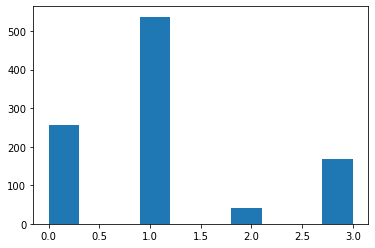

In [261]:
fin_model1= KMeans(n_clusters=4)
fin_model1.fit(movies_fin_arr)
plt.hist(fin_model1.labels_);

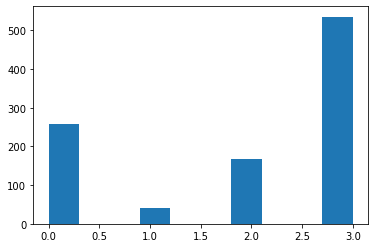

In [262]:
fin_model1= KMeans(n_clusters=4)
fin_model1.fit(movies_fin_arr2)
plt.hist(fin_model1.labels_);

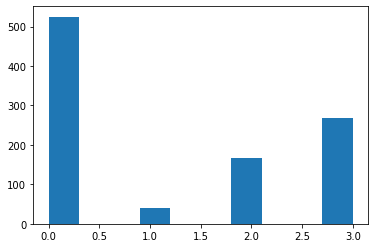

In [263]:
fin_model1= KMeans(n_clusters=4)
fin_model1.fit(movies_fin_arr3)
plt.hist(fin_model1.labels_);

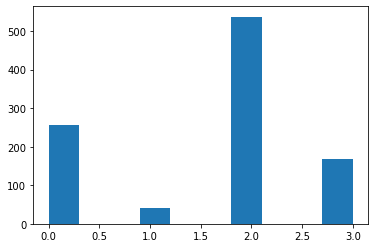

In [264]:
fin_model1= KMeans(n_clusters=4)
fin_model1.fit(movies_fin_arr4)
plt.hist(fin_model1.labels_);

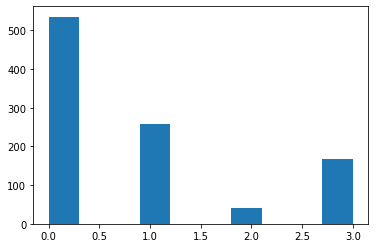

In [265]:
fin_model1= KMeans(n_clusters=4)
fin_model1.fit(movies_fin_arr4)
plt.hist(fin_model1.labels_);

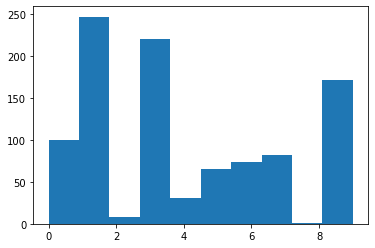

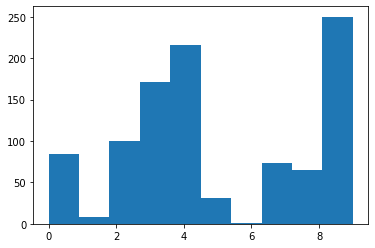

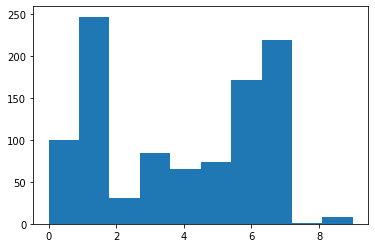

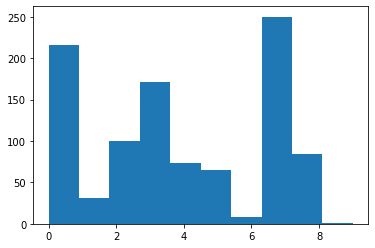

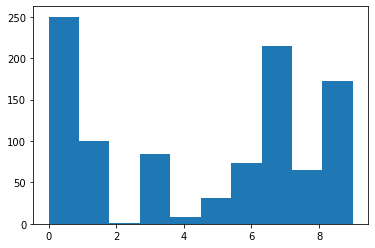

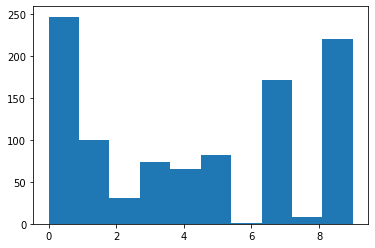

In [272]:
fin_model1= KMeans(n_clusters=10, n_init=200)
fin_model1.fit(movies_fin_arr)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=10, n_init=200)
fin_model1.fit(movies_fin_arr2)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=10, n_init=200)
fin_model1.fit(movies_fin_arr3)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=10, n_init=200)
fin_model1.fit(movies_fin_arr4)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=10, n_init=200)
fin_model1.fit(movies_fin_arr5)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=10,n_init=200)
fin_model1.fit(movies_fin_arr6)
plt.hist(fin_model1.labels_);
plt.show()

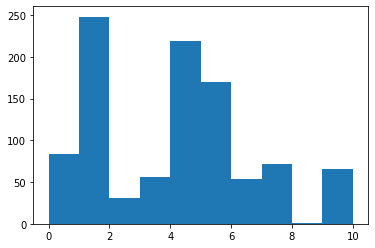

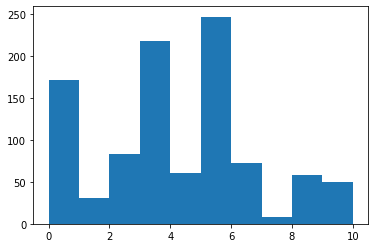

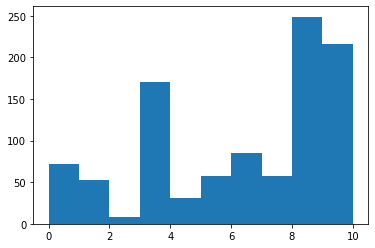

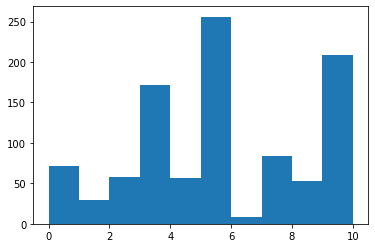

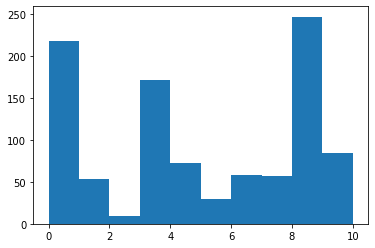

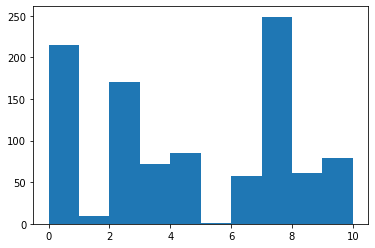

In [273]:
fin_model1= KMeans(n_clusters=11, n_init=200)
fin_model1.fit(movies_fin_arr)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=11, n_init=200)
fin_model1.fit(movies_fin_arr2)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=11, n_init=200)
fin_model1.fit(movies_fin_arr3)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=11, n_init=200)
fin_model1.fit(movies_fin_arr4)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=11, n_init=200)
fin_model1.fit(movies_fin_arr5)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=11,n_init=200)
fin_model1.fit(movies_fin_arr6)
plt.hist(fin_model1.labels_);
plt.show()

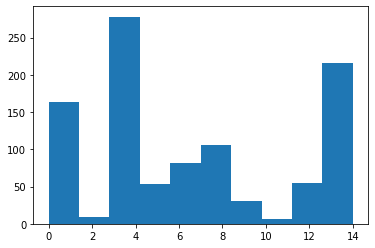

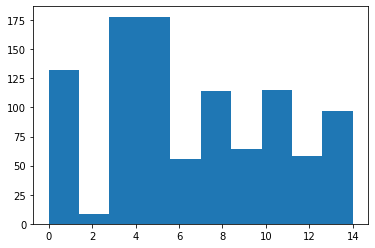

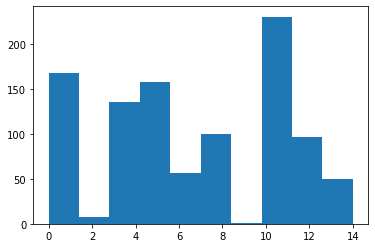

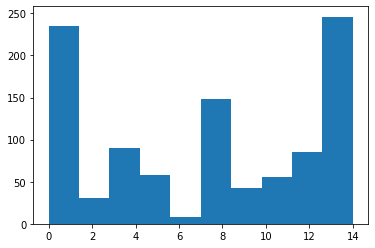

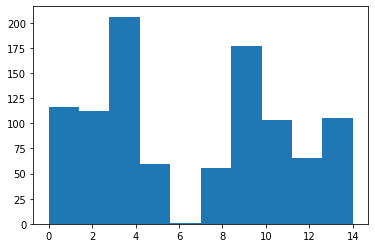

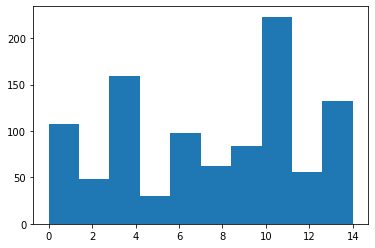

In [276]:
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr2)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr3)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr4)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr5)
plt.hist(fin_model1.labels_);
plt.show()
fin_model1= KMeans(n_clusters=15,n_init=200)
fin_model1.fit(movies_fin_arr6)
plt.hist(fin_model1.labels_);
plt.show()

In [277]:
fin_model= KMeans(n_clusters=15,n_init=200)
fin_model.fit(movies_fin_arr6)

KMeans(n_clusters=15, n_init=200)

## Application that lists similar films like one passed as argument (numeric version from DF)

#### Choose a film from IMDB's Top 1000 and the application will recomend similar movies

In [416]:
movie_number=int(input("Movie Number = "))
try:
    label=fin_model.labels_
    label=label[movie_number]
    movies_to_recommend=[]
    for i in range(len(titles)):
        if fin_model.labels_[i]==label:
            movies_to_recommend.append(titles[i])
    print("\nOther films you might like:\n")
    films=''
    for i in movies_to_recommend:
        films+=i
        films+="\n"
    print(films)
except:
    print("Incorrect argument, movie numbers can only be integers in range from 0 to 1000")

Movie Number = 1

Other films you might like:

The Godfather
Schindler's List
The Godfather: Part II
The Lord of the Rings: The Fellowship of the Ring
The Good, the Bad and the Ugly
Saving Private Ryan
The Green Mile
Seven Samurai
Once Upon a Time in the West
Amadeus
Heat
Scarface
Judgment at Nuremberg
Casino
Ran
The Great Escape
The Bridge on the River Kwai
Farewell My Concubine
Gandhi
Fanny and Alexander
The Deer Hunter
Barry Lyndon
The Sound of Music
The Best Years of Our Lives
Winter Sleep
Magnolia
JFK
Solaris
Fiddler on the Roof
The Leopard
La dolce vita
Anatomy of a Murder
Kal Ho Naa Ho
Titanic
Blood In, Blood Out
Kagemusha
Patton
Doctor Zhivago
Spartacus
The Irishman
Veer-Zaara
The Right Stuff
My Fair Lady
Short Cuts
Malcolm X
The Last Emperor
Nashville
The Longest Day
Where Eagles Dare



## Application that lists similar films like one passed as argument (title version from DF)

In [358]:
movie_titl=input("Movie Title = ")
try:
    label=fin_model.labels_
    label=label[titles_arr.index(movie_titl)]
    movies_to_recommend=[]
    for i in range(len(titles)):
        if fin_model.labels_[i]==label:
            movies_to_recommend.append(titles[i])
    print("\nOther films you might like:\n")
    films=''
    for i in movies_to_recommend:
        films+=i
        films+="\n"
    print(films)
except:
    print("Incorrect Argument-> Movie not found in the Database, please try again")

Movie Title = American Psycho

Other films you might like:

Whiplash
The Intouchables
The Usual Suspects
Léon: The Professional
Back to the Future
Your Name.
Snatch
Requiem for a Dream
Toy Story
Reservoir Dogs
Full Metal Jacket
Kill Bill: Vol. 1
Lock, Stock and Two Smoking Barrels
Children of Heaven
The Thing
Tangerines
Before Sunset
The Celebration
The Iron Giant
In the Mood for Love
Trainspotting
Fargo
Before Sunrise
Three Colors: Red
Groundhog Day
Paper Moon
Song of the Sea
The Perks of Being a Wallflower
Black Swan
Persepolis
Spring, Summer, Fall, Winter... and Spring
Infernal Affairs
The Straight Story
Central Station
The Princess Bride
Goodbye, Children
Pink Floyd: The Wall
Life of Brian
Sing Street
Jojo Rabbit
The Wrestler
In Bruges
Fantastic Mr. Fox
3-Iron
The Return
Shaun of the Dead
Ghost in the Shell
Once Were Warriors
Three Colors: Blue
Edward Scissorhands
My Left Foot
Hannah and Her Sisters
This Is Spinal Tap
A Christmas Story
Dragon Ball Super: Broly
I, Daniel Blake
Hunt 

## Application that recommends films based on new the new entry

In [362]:
title=input("Movie title = ")
year=input("Year of release = ")
movie_rating=input("Rating of the movie = ")
metascore=input("Metascore = ")
gross=input("Gross income of the film = ")
desc=input("Description, up to 1000 words = ")

Movie title = Shrek
Year of release = 2004
Rating of the movie = 8.9
Metascore = 93
Gross income of the film = 230
Description, up to 1000 words = ogre, donkey and magic


In [376]:
n=int(input("Number of movies you want recomended from description = "))
try:
    des=movies_df["Description"]
    des=list(des)
    des.append(desc)
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(des)
    nbrs = NearestNeighbors(n_neighbors=n+1, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    films=indices[-1]
    print("\nRecommended Movies:\n")
    for i in films:
        try:
            titles_arr[i]
            print(titles_arr[i])
        except:
            pass
except:
    print("Error with number of arguments")

Number of movies you want recomended from description = 8

Recommended Movies:

Castle in the Sky
Shrek
Harry Potter and the Goblet of Fire
Aladdin
Color It Yellow
The Tale of The Princess Kaguya
Kung Fu Hustle
Dilwale Dulhania Le Jayenge


In [384]:
des=movies_df["Description"]
des=list(des)
des.append(desc)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(des)
modell= KMeans(n_clusters=15, init='k-means++', max_iter=100)
modell.fit(X)
lab=modell.labels_[-1]
new_movie=[year, movie_rating,metascore, gross, lab]
movies_fin_arr.append(new_movie)
for i in range(len(movies_fin_arr)):
    movies_fin_arr[i].append(movies_fin_arr[i][0])
    movies_fin_arr[i].append(movies_fin_arr[i][1])
    movies_fin_arr[i].append(movies_fin_arr[i][2])
    movies_fin_arr[i].append(movies_fin_arr[i][3])
    movies_fin_arr[i].append(movies_fin_arr[i][5])
    movies_fin_arr[i].append(movies_fin_arr[i][5])
    movies_fin_arr[i].append(movies_fin_arr[i][5])
    movies_fin_arr[i].append(movies_fin_arr[i][5])
    movies_fin_arr[i].append(movies_fin_arr[i][5])
movies_fin_arr

[[1994, 142, 9.3, 81, 28.34, 2, 1994, 142, 9.3, 81, 2, 2, 2, 2, 2],
 [1972, 175, 9.2, 100, 34.97, 6, 1972, 175, 9.2, 100, 6, 6, 6, 6, 6],
 [2008, 152, 9.0, 84, 534.8, 1, 2008, 152, 9.0, 84, 1, 1, 1, 1, 1],
 [2003, 201, 9.0, 94, 377.85, 1, 2003, 201, 9.0, 94, 1, 1, 1, 1, 1],
 [1993, 195, 9.0, 94, 9.9, 0, 1993, 195, 9.0, 94, 0, 0, 0, 0, 0],
 [1974, 202, 9.0, 90, 57.3, 9, 1974, 202, 9.0, 90, 9, 9, 9, 9, 9],
 [1957, 96, 9.0, 96, 4.3, 6, 1957, 96, 9.0, 96, 6, 6, 6, 6, 6],
 [2021, 164, 8.9, 0, 32.82, 5, 2021, 164, 8.9, 0, 5, 5, 5, 5, 5],
 [1994, 154, 8.9, 94, 7.93, 10, 1994, 154, 8.9, 94, 10, 10, 10, 10, 10],
 [2010, 148, 8.8, 74, 292.58, 6, 2010, 148, 8.8, 74, 6, 6, 6, 6, 6],
 [2002, 179, 8.8, 87, 342.55, 7, 2002, 179, 8.8, 87, 7, 7, 7, 7, 7],
 [1999, 139, 8.8, 66, 37.3, 5, 1999, 139, 8.8, 66, 5, 5, 5, 5, 5],
 [2001, 178, 8.8, 92, 35.54, 1, 2001, 178, 8.8, 92, 1, 1, 1, 1, 1],
 [1994, 142, 8.8, 82, 33.25, 9, 1994, 142, 8.8, 82, 9, 9, 9, 9, 9],
 [1966, 178, 8.8, 90, 32.82, 0, 1966, 178, 8.8, 

In [389]:
new_movie=new_movie[:7]
movies_fin_arr[-1]=new_movie
movies_fin_arr[-1]

['2004', '8.9', '93', '230', 2, '2004', '8.9']

In [396]:
movies_fin_arr[-1]=movies_fin_arr[-1][:7]
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])

In [399]:
movies_fin_arr[-1].append(movies_fin_arr[-1][4])
movies_fin_arr[-1].append(movies_fin_arr[-1][4])

In [415]:
fin_model1= KMeans(n_clusters=15, n_init=200)
fin_model1.fit(movies_fin_arr)
labels_fin=fin_model1.labels_
print("\nRecommended films:\n")
label=labels_fin[-1]
for i in range(len(labels_fin)):
    if labels_fin[i]==label:
        try:
            print(titles_arr[i])
        except:
            pass


Recommended films:

